Importing required libs

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Loading data from files

In [5]:
test = np.loadtxt('lab_1_test.csv', delimiter=',', skiprows=1)
train = np.loadtxt('lab_1_train.csv', delimiter=',', skiprows=1)

Splitting data into training and testing sets

In [6]:
train_data = train[:, 1:]
test_data = test[:, 1:]

In [7]:
alpha = 0.01
delta = 0.000001

Defining the learning rate (alpha) and delta

Initializing the weights (in our case beta0 and beta1) with zeros (quite common case) 

In [8]:
beta = np.zeros((2, 1))

Defining the loss (cost) function (mean squared error)

In [9]:
def compute_cost(x, y, beta):
    m = len(y)
    p = x.dot(beta)
    return (1/(2*m)) * np.sum(np.square(p - y))

Defining gradient descent to minimize the loss function, where the loop stop factor is difference between prev and cur loss values being < delta

In [10]:
def gradient_descent(x, y, beta, alpha, delta):
    m = len(y)
    prev_loss, cur_loss = 0, 0
    i = 0
    while True:
        i += 1
        h = x.dot(beta)
        beta = beta - (alpha/m) * x.T.dot(h - y)
        cur_loss = compute_cost(x, y, beta)
        print('Iteration', i, 'Loss =', cur_loss)
        if np.abs(prev_loss - cur_loss) < delta:
            break
        prev_loss = cur_loss
    return beta, cur_loss

Adding a column of ones to the data matrix for the intercept term (beta0) and reshaping train target data into single column array 

In [11]:
x_train = np.hstack((np.ones((len(train_data), 1)), train_data[:, :-1]))
y_train = train_data[:, -1].reshape((-1, 1))

Running gradient descent on the training data

In [12]:
beta, final_loss = gradient_descent(x_train, y_train, beta, alpha, delta)

Iteration 1 Loss = 206.65857757979356
Iteration 2 Loss = 202.17787676259215
Iteration 3 Loss = 197.79444023128175
Iteration 4 Loss = 193.50615657776237
Iteration 5 Loss = 189.31096022830326
Iteration 6 Loss = 185.20683044857154
Iteration 7 Loss = 181.19179037026078
Iteration 8 Loss = 177.26390603884835
Iteration 9 Loss = 173.42128548202513
Iteration 10 Loss = 169.6620777983464
Iteration 11 Loss = 165.9844722656679
Iteration 12 Loss = 162.3866974689344
Iteration 13 Loss = 158.8670204469031
Iteration 14 Loss = 155.4237458573897
Iteration 15 Loss = 152.05521516063516
Iteration 16 Loss = 148.7598058203999
Iteration 17 Loss = 145.53593052240115
Iteration 18 Loss = 142.38203640971545
Iteration 19 Loss = 139.29660433477994
Iteration 20 Loss = 136.27814812763057
Iteration 21 Loss = 133.32521388002576
Iteration 22 Loss = 130.4363792451101
Iteration 23 Loss = 127.61025275228064
Iteration 24 Loss = 124.84547313692681
Iteration 25 Loss = 122.14070868471947
Iteration 26 Loss = 119.4946565901346
Ite

Printing the final weights and loss function value

In [13]:
print('Final Weights:', beta.ravel())
print('Final Loss:', final_loss)

Final Weights: [19.8554217   2.31965826]
Final Loss: 0.03829964038918736


Adding a column of ones to the test data matrix for the intercept term (beta0)

In [14]:
x_test = np.hstack((np.ones((len(test_data), 1)), test_data[:, :-1]))
y_test = test_data[:, -1]

Computing and printing the loss function on the test data

In [15]:
test_loss = compute_cost(x_test, y_test.reshape((-1, 1)), beta)
print('Test Loss:', test_loss)

Test Loss: 0.04514858744558952


Plotting the training and testing data points, the line of best fit (our predicted values) and legend with labes. Stretching our line on the test vals area to see result

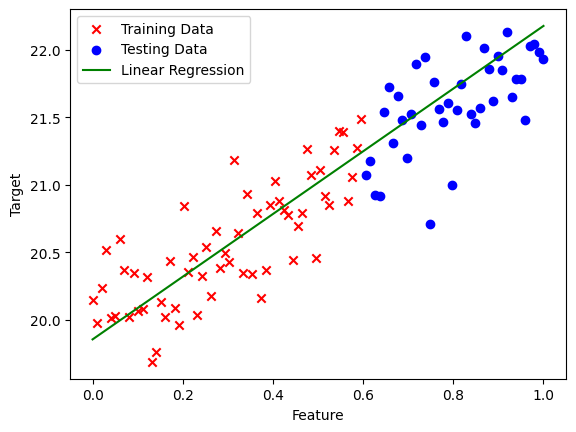

In [20]:
plt.scatter(train_data[:, 0], train_data[:, 1], marker='x', color='r', label='Training Data')
plt.scatter(test_data[:, 0], test_data[:, 1], marker='o', color='b', label='Testing Data')
x_min, x_max = min(np.min(train[:, 1]), np.min(test[:, 1])), max(np.max(train[:, 1]), np.max(test[:, 1]))
x_vals = np.linspace(x_min, x_max, 100)
y_vals = beta[0] + beta[1]*x_vals
plt.plot(x_vals, y_vals, color='g', label='Linear Regression')
plt.legend()
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()